# OpenCV 사용법
## 1. 개요
- 영상 처리와 컴퓨터 비전을 위한 오픈소스 라이브러리
- C, C++, Python 등에서 사용 가능
- 설치: pip install opencv-python

## 2. 이미지 읽어서 살펴보기
#### cv2.imread(file_name, flag)
- 이미지를 읽어 Numpy 객체로 만드는 함수
    1. file_name: 읽고자 하는 이미지 파일
    2. flag: 이미지를 읽는 방법 설정
        * IMREAD_COLOR: 이미지를 Color로 읽고, 투명한 부분은 무시
        * IMREAD_GRAYSCALE: 이미지를 Grayscale로 읽기
        * IMREAD_UNCHANGED: 이미지를 Color로 읽고, 투명한 부분도 읽기(Alpha)
    3. 반환 값: Numpy 객체(행, 열, 색상: 기본 BGR)
- Jupyter Notebook 에서 보여줄 때는 plt.imshow()

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

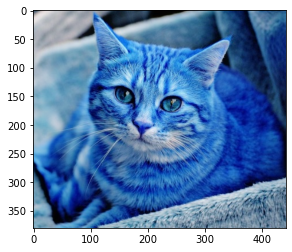

In [2]:
# OpenCV는 RGB가 아니라 BGR로 되어있음
image = cv2.imread('../images/cat.jpg', cv2.IMREAD_COLOR)
# cv2.imshow(title, image)
plt.imshow(image)

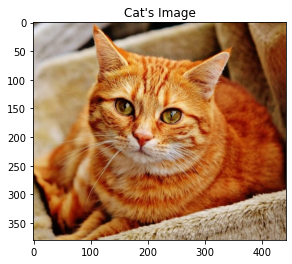

In [3]:
cat = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title("Cat's Image")
plt.imshow(cat)

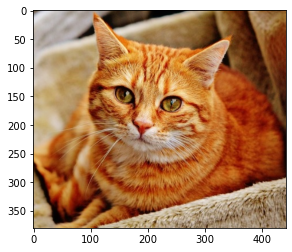

In [4]:
# 변환하지 않고 한 번에 출력
b, g, r = cv2.split(image)   # img파일을 b,g,r로 분리
image = cv2.merge([r,g,b])   # b, r을 바꿔서 Merge
plt.imshow(image)

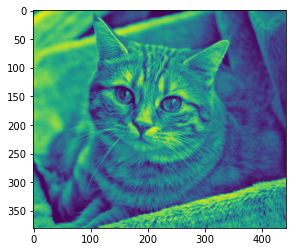

In [5]:
# Gray Scale Image
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayImage)

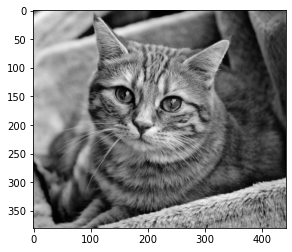

In [6]:
plt.imshow(grayImage, cmap=plt.get_cmap('gray'))

## 3. OpenCV 이미지 연산
#### 픽셀수 및 이미지 크기 확인

In [7]:
image = cv2.imread('../images/image_2.png')
print(image.shape)
print(image.size)

(720, 1280, 3)
2764800


#### 특정 범위 픽셀 변경

In [8]:
image = cv2.imread('../images/cat.jpg', cv2.IMREAD_COLOR)
import time
start_time = time.time()
for i in range(0, 100):
    for j in range(0, 100):
        image[i, j] = [255, 255, 255]
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.007982254028320312 seconds ---


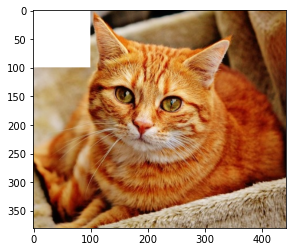

In [9]:
# cv2.imshow('Image', image)
basicImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(basicImage)

In [10]:
start_time = time.time()
basicImage[0:100, 0:100] = [0, 0, 0]
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0 seconds ---


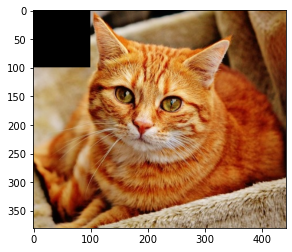

In [11]:
plt.imshow(basicImage)

## 4. OpenCV 이미지 변형
#### 보간법
![title](../images/보간법.png)

#### 이미지 크기 조절
#### cv2.resize(image, dsize, fx, fy, interpolation)
- dsize: Manual Size
- fx: 가로 비율
- fy: 세로 비율
- interpolation: 보간법
    * INTER_CUBIC: 사이즈를 크게 할 때 주로 사용
    * INTER_AREA: 사이즈를 작게 할 때 주로 사용

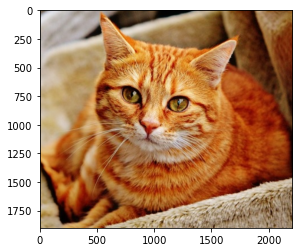

In [34]:
image = cv2.imread('../images/cat.jpg')

expand = cv2.resize(image, None, fx=5.0, fy=5.0, 
                    interpolation=cv2.INTER_CUBIC)
# cv2.imshow('Image', expand)
image = cv2.cvtColor(expand, cv2.COLOR_BGR2RGB)
plt.imshow(image)

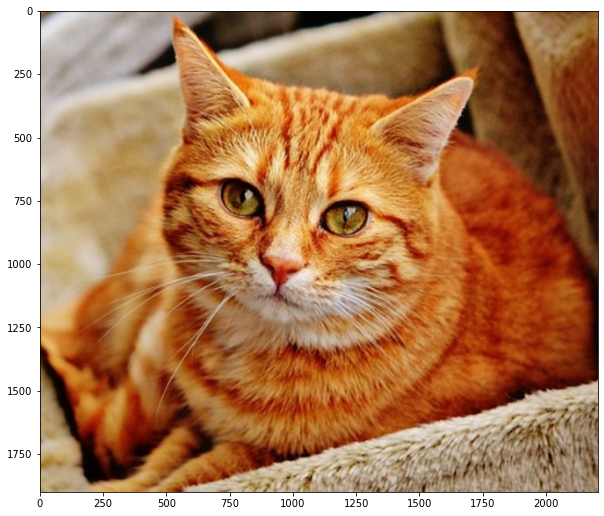

In [35]:
plt.figure(figsize=(10,10))
plt.imshow(image)

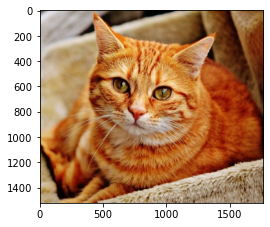

In [36]:
shrink = cv2.resize(image, None, fx=0.8, fy=0.8, 
                    interpolation=cv2.INTER_AREA)
# cv2.imshow('Image', shrink)
plt.figure(figsize=(4,4))
plt.imshow(shrink)

#### 이미지 위치 변경
#### cv2.warpAffine(image, M, dsize)
- M: 변환 행렬
- dsize: Manual Size

- 변환 행렬
    * 𝑀11 𝑀12 𝑀13
    * 𝑀21 𝑀22 𝑀23
- 이미지의 모든 좌표 (a, b)는 다음의 좌표로 이동
    * (𝑀11 ∗ 𝑎 + 𝑀12 ∗ 𝑏 + 𝑀13, 𝑀21 ∗ 𝑎 + 𝑀22 ∗ 𝑏 + 𝑀23)
- 단순 이미지 위치 변경
    * 1  0  x위치
    * 0  1  y위치

In [37]:
image = cv2.imread('../images/cat.jpg')
# 행과 열 정보만 저장
height, width = image.shape[:2]
height, width

(380, 441)

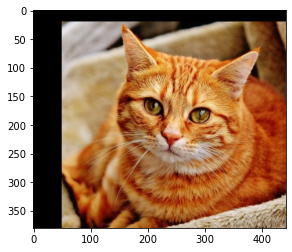

In [38]:
M = np.float32([[1, 0, 50], [0, 1, 20]])
dst = cv2.warpAffine(image, M, (width, height))
# cv2.imshow('Image', dst)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst)

#### 이미지 회전
#### cv2.getRotationMatrix2D(center, angle, scale)
- center: 회전 중심
- angle: 회전 각도
- scale: Scale Factor

- 회전 변환을 위한 기본적인 행렬
    * 𝑐𝑜𝑠𝜃 −𝑠𝑖𝑛𝜃
    * 𝑠𝑖𝑛𝜃 𝑐𝑜𝑠𝜃

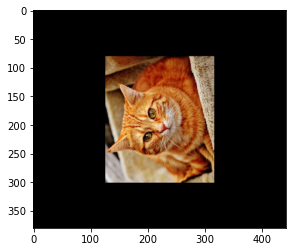

In [17]:
image = cv2.imread('../images/cat.jpg')
# 행과 열 정보만 저장
height, width = image.shape[:2]

M = cv2.getRotationMatrix2D((width / 2, height / 2), 90, 0.5)
dst = cv2.warpAffine(image, M, (width, height))
# cv2.imshow('Image', dst)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst)

## 5. OpenCV 이미지 합치기
#### 이미지 합치기
- cv2.add(): Saturation 연산 수행. 0 보다 작으면 0, 255 보다 크면 255 로 표현
- np.add(): Modulo 연산 수행. 256은 0, 257 은 1 로 표현

In [18]:
image_1 = cv2.imread('../images/image_1.jpg')
image_2 = cv2.imread('../images/image_2.png')

- Saturation 연산으로 이미지 합치기

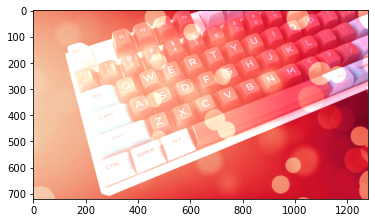

In [19]:
result = cv2.add(image_1, image_2)
# cv2.imshow('Image', result)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result)

- Modulo 연산으로 이미지 합치기

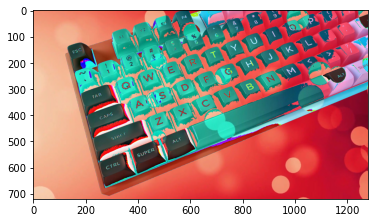

In [20]:
result2 = image_1 + image_2
# cv2.imshow('Image', result)
result2 = cv2.cvtColor(result2, cv2.COLOR_BGR2RGB)
plt.imshow(result2)

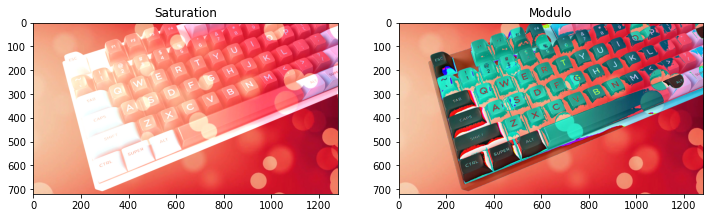

In [21]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('Saturation')
plt.imshow(result)

plt.subplot(122)
plt.title('Modulo')
plt.imshow(result2)

## 6. OpenCV 임계점 처리하기
#### 이미지의 기본 이진화
#### cv2.threshold(image, threshold, max_value, type)
- 임계값을 기준으로 흑/백으로 분류하는 함수
- image: 처리할 Gray Scale 이미지
- threshold: 임계값 (전체 픽셀에 적용)
- max_value : 임계값을 넘었을 때 적용할 값
- type: 임계점을 처리하는 방식
    * THRESH_BINARY: 임계값보다 크면 max_value, 작으면 0
    * THRESH_BINARY_INV: 임계값보다 작으면 max_value, 크면 0
    * THRESH_TRUNC: 임계값보다 크면 임계값, 작으면 그대로
    * THRESH_TOZERO: 임계값보다 크면 그대로, 작으면 0
    * THRESH_TOZERO_INV: 임계값보다 크면 0, 작으면 그대로

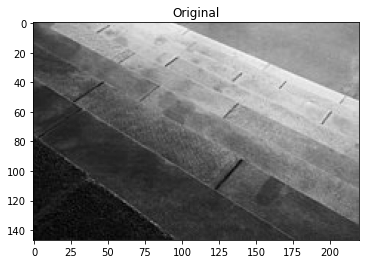

In [22]:
basic = cv2.imread('../images/gray_image.jpg', cv2.IMREAD_GRAYSCALE)
plt.title('Original')
plt.imshow(basic, cmap=plt.get_cmap('gray'))

In [23]:
grey1 = cv2.threshold(basic, 127, 255, cv2.THRESH_BINARY)
grey2 = cv2.threshold(basic, 127, 255, cv2.THRESH_BINARY_INV)
grey3 = cv2.threshold(basic, 127, 255, cv2.THRESH_TRUNC)
grey4 = cv2.threshold(basic, 127, 255, cv2.THRESH_TOZERO)
grey5 = cv2.threshold(basic, 127, 255, cv2.THRESH_TOZERO_INV)

In [24]:
grey1

(127.0,
 array([[  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8))

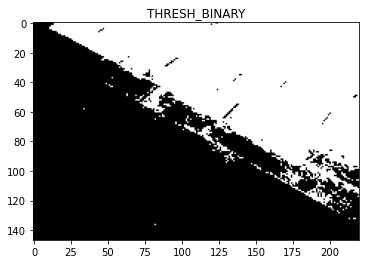

In [25]:
plt.title('THRESH_BINARY')
plt.imshow(grey1[1], cmap=plt.get_cmap('gray'))

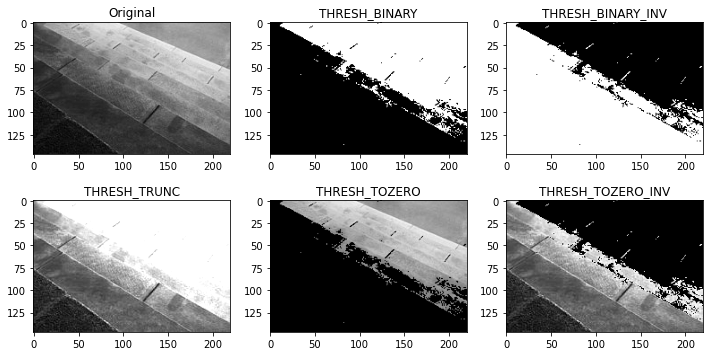

In [26]:
plt.figure(figsize=(12,6))
plt.subplot(231)
plt.title('Original')
plt.imshow(basic, cmap=plt.get_cmap('gray'))

plt.subplot(232)
plt.title('THRESH_BINARY')
plt.imshow(grey1[1], cmap=plt.get_cmap('gray'))

plt.subplot(233)
plt.title('THRESH_BINARY_INV')
plt.imshow(grey2[1], cmap=plt.get_cmap('gray'))

plt.subplot(234)
plt.title('THRESH_TRUNC')
plt.imshow(grey3[1], cmap=plt.get_cmap('gray'))

plt.subplot(235)
plt.title('THRESH_TOZERO')
plt.imshow(grey4[1], cmap=plt.get_cmap('gray'))

plt.subplot(236)
plt.title('THRESH_TOZERO_INV')
plt.imshow(grey5[1], cmap=plt.get_cmap('gray'))

#### 이미지의 적응 임계점 처리
#### cv2.adaptiveThreshold(image, max_value, adaptive_method, type, block_size, C)
- 적응 임계점 처리 함수
- max_value: 임계값을 넘었을 때 적용할 값
- adaptive_method: 임계값을 결정하는 계산 방법
    * ADAPTIVE_THRESH_MEAN_C: 주변영역의 평균값으로 결정
    * ADAPTIVE_THRESH_GAUSSIAN_C: Gaussian 윈도우 기반의 가중치들의 합에서 C를 뺀 값을 임계점으로 설정
- type: 임계점을 처리하는 방식
- block_size: 임계값을 적용할 영역의 크기
- C: 평균이나 가중 평균에서 차감할 값

In [27]:
image = cv2.imread('../images/hand_writing_image.jpg', cv2.IMREAD_GRAYSCALE)
thres1 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 3)
thres2 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 3)

In [28]:
thres1

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255,   0,   0],
       ...,
       [  0,   0, 255, ..., 255, 255, 255],
       [  0,   0, 255, ..., 255, 255, 255],
       [  0, 255, 255, ..., 255, 255, 255]], dtype=uint8)

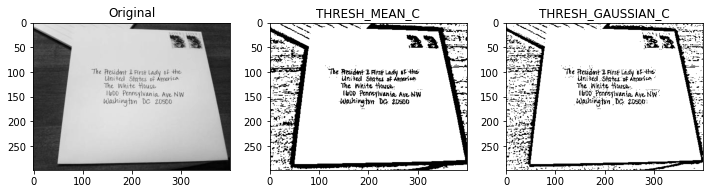

In [29]:
# 하나의 이미지에 다수의 조명 상태가 존재하는 경우
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title('Original')
plt.imshow(image, cmap=plt.get_cmap('gray'))

plt.subplot(132)
plt.title('THRESH_MEAN_C')
plt.imshow(thres1, cmap=plt.get_cmap('gray'))

plt.subplot(133)
plt.title('THRESH_GAUSSIAN_C')
plt.imshow(thres2, cmap=plt.get_cmap('gray'))